<div class="alert alert-info">
Привет, Артем! Меня зовут Светлана Чих и я буду проверять твой проект. Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе. Предлагаю общаться на «ты». Но если это не удобно - дай знать, и мы перейдем на «вы».

<div class="alert alert-success">
<b>👍 Успех:</b> Зелёным цветом отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Жёлтым цветом выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-danger">
<b>😔 Необходимо исправить:</b> Красным цветом выделены комментарии, без исправления которых, я не смогу принять проект :(
</div>
<div class="alert alert-info">
<b>👂 Совет:</b> Какие-то дополнительные материалы
</div>
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>🎓 Комментарий студента:</b> Например, вот так.</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта быстрее.
 </div>


# Проект: телекоммуникации

<div class="alert">
<h2> Описание проекта <a class="tocSkip"> </h2>

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Моя задача — обучить на этих данных модель для прогноза оттока клиентов.

Оператор предоставляет два основных типа услуг: 
Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).
Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

<b> Описание данных </b> 

Данные состоят из нескольких файлов, полученных из разных источников: \
contract_new.csv — информация о договоре; \
personal_new.csv — персональные данные клиента; \
internet_new.csv — информация об интернет-услугах; \
phone_new.csv — информация об услугах телефонии. 


<b> Файл contract_new.csv </b> \
customerID — идентификатор абонента; \
BeginDate — дата начала действия договора; \
EndDate — дата окончания действия договора; \
Type — тип оплаты: раз в год-два или ежемесячно; \
PaperlessBilling — электронный расчётный лист; \
PaymentMethod — тип платежа; \
MonthlyCharges — расходы за месяц; \
TotalCharges — общие расходы абонента. 
    
<b> Файл personal_new.csv </b> \
customerID — идентификатор пользователя; \
gender — пол; \
SeniorCitizen — является ли абонент пенсионером; \
Partner — есть ли у абонента супруг или супруга; \
Dependents — есть ли у абонента дети.

<b> Файл internet_new.csv </b> \
customerID — идентификатор пользователя; \ 
InternetService — тип подключения; \
OnlineSecurity — блокировка опасных сайтов; \
OnlineBackup — облачное хранилище файлов для резервного копирования данных; \
DeviceProtection — антивирус; \
TechSupport — выделенная линия технической поддержки; \
StreamingTV — стриминговое телевидение; \
StreamingMovies — каталог фильмов.

<b> Файл phone_new.csv </b> \
customerID — идентификатор пользователя; \
MultipleLines — подключение телефона к нескольким линиям одновременно. 
    
Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

In [1]:
!pip install phik

In [2]:
# импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik import resources, report

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
RANDOM_STATE = 190224
scaler = StandardScaler()
encoder = OneHotEncoder(sparse=False, drop='first') 

<div class="alert alert-success">
<b>👍 Успех:</b> Импортированы нужные библиотеки, определены константы!
</div>

In [4]:
# инициализация входных данных

contract = pd.read_csv('/datasets/contract_new.csv', parse_dates={"date": ["BeginDate"]})
personal = pd.read_csv('/datasets/personal_new.csv')
internet = pd.read_csv('/datasets/internet_new.csv')
phone = pd.read_csv('/datasets/phone_new.csv')

### Общая информация

In [5]:
def general_info(data):
    display(data.head(10))
    print('-------------------------------INFO-----------------------------------')
    display(data.info())
    print('-------------------------------DESCRIBE-------------------------------')
    display(data.describe(percentiles=[0.05, 1/4, 1/2, 3/4, 0.95]).T)

#### Датасет contract

In [6]:
general_info(contract)

date  customerID     EndDate            Type PaperlessBilling  \
0 2020-01-01  7590-VHVEG          No  Month-to-month              Yes   
1 2017-04-01  5575-GNVDE          No        One year               No   
2 2019-10-01  3668-QPYBK          No  Month-to-month              Yes   
3 2016-05-01  7795-CFOCW          No        One year               No   
4 2019-09-01  9237-HQITU          No  Month-to-month              Yes   
5 2019-03-01  9305-CDSKC          No  Month-to-month              Yes   
6 2018-04-01  1452-KIOVK          No  Month-to-month              Yes   
7 2019-04-01  6713-OKOMC          No  Month-to-month               No   
8 2017-07-01  7892-POOKP          No  Month-to-month              Yes   
9 2014-12-01  6388-TABGU  2017-05-01        One year               No   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  
5           Electronic check           99.65      1150.96  
6    Credit card (automatic)           89.10      2058.21  
7               Mailed check           29.75       300.48  
8           Electronic check          104.80      3573.68  
9  Bank transfer (automatic)           56.15      1628.35

-------------------------------INFO-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              7043 non-null   datetime64[ns]
 1   customerID        7043 non-null   object        
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

-------------------------------DESCRIBE-------------------------------


count       mean        std    min     5%   25%    50%  \
MonthlyCharges  7043.0  64.761692  30.090047  18.25  19.65  35.5  70.35   

                  75%    95%     max  
MonthlyCharges  89.85  107.4  118.75

In [7]:
print(f"Пропущенные значения в contract:")
pd.DataFrame(round(contract.isna().mean()*100,1)).style.background_gradient('coolwarm')

Пропущенные значения в contract:


<b>Первые заметки по датасету contract: </b>
* Необходимо привести все наименования столбцов согласно PEP8.
* Верно указать формат данных (BeginDate к формату даты, EndDate - проверить, скорей всего тоже дата, TotalCharges - float64).

In [8]:
# Наименование PEP 8
contract = contract.rename(columns={'customerID': 'CustomerID', 'date': 'BeginDate'})
contract.head(1)

BeginDate  CustomerID EndDate            Type PaperlessBilling  \
0 2020-01-01  7590-VHVEG      No  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges TotalCharges  
0  Electronic check           29.85        31.04

In [9]:
# Певередем totalcharges в формат float
contract.TotalCharges = pd.to_numeric(contract.TotalCharges, errors ='coerce')
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   CustomerID        7043 non-null   object        
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 440.3+ KB


In [10]:
print(f"Пропущенные значения в contract:")
pd.DataFrame(round(contract.isna().mean()*100,1)).style.background_gradient('coolwarm')

Пропущенные значения в contract:


В столбце totalcharges появились пустые значения, давайте их проверим.

In [11]:
contract.loc[contract.TotalCharges.isna()==True]

BeginDate  CustomerID EndDate      Type PaperlessBilling  \
488  2020-02-01  4472-LVYGI      No  Two year              Yes   
753  2020-02-01  3115-CZMZD      No  Two year               No   
936  2020-02-01  5709-LVOEQ      No  Two year               No   
1082 2020-02-01  4367-NUYAO      No  Two year               No   
1340 2020-02-01  1371-DWPAZ      No  Two year               No   
3331 2020-02-01  7644-OMVMY      No  Two year               No   
3826 2020-02-01  3213-VVOLG      No  Two year               No   
4380 2020-02-01  2520-SGTTA      No  Two year               No   
5218 2020-02-01  2923-ARZLG      No  One year              Yes   
6670 2020-02-01  4075-WKNIU      No  Two year               No   
6754 2020-02-01  2775-SEFEE      No  Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  
488   Bank transfer (automatic)           52.55           NaN  
753                Mailed check           20.25           NaN  
936                Mailed check           80.85           NaN  
1082               Mailed check           25.75           NaN  
1340    Credit card (automatic)           56.05           NaN  
3331               Mailed check           19.85           NaN  
3826               Mailed check           25.35           NaN  
4380               Mailed check           20.00           NaN  
5218               Mailed check           19.70           NaN  
6670               Mailed check           73.35           NaN  
6754  Bank transfer (automatic)           61.90           NaN

Всего 11 позиций, если судить логически то это клиенты которые только что заключили договор с оплатой раз в один/два года, предлагаю заполнить их расходы значением 0

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Деньги от них еще не поступили
</div>

In [12]:
contract.TotalCharges = contract.TotalCharges.fillna(0)

In [13]:
print(f"Пропущенные значения в contract:")
pd.DataFrame(round(contract.isna().mean()*100,1)).style.background_gradient('coolwarm')

Пропущенные значения в contract:


In [14]:
contract.query("CustomerID=='4472-LVYGI'")

BeginDate  CustomerID EndDate      Type PaperlessBilling  \
488 2020-02-01  4472-LVYGI      No  Two year              Yes   

                 PaymentMethod  MonthlyCharges  TotalCharges  
488  Bank transfer (automatic)           52.55           0.0

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Датасет personal

In [15]:
general_info(personal)

customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
5  9305-CDSKC  Female              0      No         No
6  1452-KIOVK    Male              0      No        Yes
7  6713-OKOMC  Female              0      No         No
8  7892-POOKP  Female              0     Yes         No
9  6388-TABGU    Male              0      No        Yes

-------------------------------INFO-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

-------------------------------DESCRIBE-------------------------------


count      mean       std  min   5%  25%  50%  75%  95%  max
SeniorCitizen  7043.0  0.162147  0.368612  0.0  0.0  0.0  0.0  0.0  1.0  1.0

In [16]:
print(f"Пропущенные значения в personal:")
pd.DataFrame(round(personal.isna().mean()*100,1)).style.background_gradient('coolwarm')

Пропущенные значения в personal:


<b>Первые заметки по датасету personal: </b>
* Необходимо привести все наименования столбцов согласно PEP8.

In [17]:
# Наименование PEP 8
personal = personal.rename(columns={'customerID': 'CustomerID', 'gender': 'Gender'})
personal.head(1)

CustomerID  Gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Датасет internet

In [18]:
general_info(internet)

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   
5  9305-CDSKC     Fiber optic             No           No              Yes   
6  1452-KIOVK     Fiber optic             No          Yes               No   
7  6713-OKOMC             DSL            Yes           No               No   
8  7892-POOKP     Fiber optic             No           No              Yes   
9  6388-TABGU             DSL            Yes          Yes               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
5          No         Yes             Yes  
6          No         Yes              No  
7          No          No              No  
8         Yes         Yes             Yes  
9          No          No              No

-------------------------------INFO-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


None

-------------------------------DESCRIBE-------------------------------


count unique          top  freq
customerID        5517   5517   5949-XIKAE     1
InternetService   5517      2  Fiber optic  3096
OnlineSecurity    5517      2           No  3498
OnlineBackup      5517      2           No  3088
DeviceProtection  5517      2           No  3095
TechSupport       5517      2           No  3473
StreamingTV       5517      2           No  2810
StreamingMovies   5517      2           No  2785

In [19]:
print(f"Пропущенные значения в internet:")
pd.DataFrame(round(internet.isna().mean()*100,1)).style.background_gradient('coolwarm')

Пропущенные значения в internet:


<b>Первые заметки по датасету internet: </b>
* Необходимо привести все наименования столбцов согласно PEP8.

In [20]:
# Наименование PEP 8
internet = internet.rename(columns={'customerID': 'CustomerID'})
internet.head(1)

CustomerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Датасет phone

In [21]:
general_info(phone)

customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
5  7892-POOKP           Yes
6  6388-TABGU            No
7  9763-GRSKD            No
8  7469-LKBCI            No
9  8091-TTVAX           Yes

-------------------------------INFO-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


None

-------------------------------DESCRIBE-------------------------------


count unique         top  freq
customerID     6361   6361  6000-UKLWI     1
MultipleLines  6361      2          No  3390

In [22]:
print(f"Пропущенные значения в phone:")
pd.DataFrame(round(phone.isna().mean()*100,1)).style.background_gradient('coolwarm')

Пропущенные значения в phone:


<b>Первые заметки по датасету phone: </b>
* Необходимо привести все наименования столбцов согласно PEP8.

In [23]:
# Наименование PEP 8
phone = phone.rename(columns={'customerID': 'CustomerID'})
phone.head(1)

CustomerID MultipleLines
0  5575-GNVDE            No

#### Общие выводы по первому пункту работы:
* на входе имеем четыре датасета, их описание указано в начале проекта;
* проверили датасеты на пропуски;
* заполнили пропуски в столбце TotalCharges (новые клиенты);
* привели наименование столбцов в каждом датасете к PEP 8;
* привели данные к верному типу данных.

<div class="alert alert-success">
<b>👍 Успех:</b> Датасеты загружены, просмотрены и обработаны!
</div>

### Исследовательский анализ и предобработка данных

In [24]:
# Функция временных переменных для создания графиков

def count_all (data, col):
    y = data.groupby(col)[col].count().sort_values(ascending=False)
    return y

In [25]:
display(f'Дубликаты contract: {contract.duplicated().sum()}')
display(f'Дубликаты personal: {personal.duplicated().sum()}')
display(f'Дубликаты internet: {internet.duplicated().sum()}')
display(f'Дубликаты phone: {phone.duplicated().sum()}')

'Дубликаты contract: 0'

'Дубликаты personal: 0'

'Дубликаты internet: 0'

'Дубликаты phone: 0'

Дубликатов во всех датасетах нет

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Датасет contract

In [26]:
contract.nunique()

BeginDate             77
CustomerID          7043
EndDate               67
Type                   3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6658
dtype: int64

In [27]:
contract.head(3)

BeginDate  CustomerID EndDate            Type PaperlessBilling  \
0 2020-01-01  7590-VHVEG      No  Month-to-month              Yes   
1 2017-04-01  5575-GNVDE      No        One year               No   
2 2019-10-01  3668-QPYBK      No  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges  TotalCharges  
0  Electronic check           29.85         31.04  
1      Mailed check           56.95       2071.84  
2      Mailed check           53.85        226.17

Предлагаю создать новый столбец - Sign , в котором зададим целевой признак 0 - клиент остался, 1 - клиент ушел, сгенерируем данные из столбца EndDate. В столбце EndDate 'No' заполним крайней датой (2020-02-01), чтобы можно посчитать общее время пользованием услугами связи и создадим для этого новый признак - UseTime

In [28]:
contract['Sign'] = (contract['EndDate'] != 'No').astype(int)
contract.sample(5)

BeginDate  CustomerID     EndDate            Type PaperlessBilling  \
3126 2017-12-01  9754-CLVZW          No  Month-to-month               No   
4017 2017-10-01  9473-CBZOP          No        One year               No   
831  2016-12-01  9650-VBUOG  2017-09-01        Two year               No   
2092 2014-02-01  2251-PYLPB  2016-06-01        Two year               No   
3480 2014-04-01  6060-QBMGV          No        Two year               No   

                PaymentMethod  MonthlyCharges  TotalCharges  Sign  
3126  Credit card (automatic)           38.85       1010.10     0  
4017             Mailed check           59.00       1784.16     0  
831   Credit card (automatic)           25.05        243.49     1  
2092  Credit card (automatic)           79.55       2227.40     1  
3480  Credit card (automatic)           19.85       1389.50     0

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Отнекиваться не буду, код подглядел. Сам не смог разобраться как заменить все позиции с датами на 1, нужно либо через цикл прогонять, либо кортеж создавать? Вообщем итак и так не получилось. Да и почему в данном коде создаётся 0 и 1 тоже не могу понять...
</div>

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Здесь проверяется условкие и в итоге получается булево знвчение - False или True при приобразовании в целое цисло получают 0 и 1
</div>

In [29]:
contract['EndDate'] = contract['EndDate'].replace({'No': '2020-02-01'})

In [30]:
contract['EndDate'].nunique()

67

In [31]:
# приведем тип данных EndDate к типу данных
contract['EndDate'] = pd.to_datetime(contract['EndDate'], format='%Y-%m-%d')

In [32]:
contract.head(7)

BeginDate  CustomerID    EndDate            Type PaperlessBilling  \
0 2020-01-01  7590-VHVEG 2020-02-01  Month-to-month              Yes   
1 2017-04-01  5575-GNVDE 2020-02-01        One year               No   
2 2019-10-01  3668-QPYBK 2020-02-01  Month-to-month              Yes   
3 2016-05-01  7795-CFOCW 2020-02-01        One year               No   
4 2019-09-01  9237-HQITU 2020-02-01  Month-to-month              Yes   
5 2019-03-01  9305-CDSKC 2020-02-01  Month-to-month              Yes   
6 2018-04-01  1452-KIOVK 2020-02-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Sign  
0           Electronic check           29.85         31.04     0  
1               Mailed check           56.95       2071.84     0  
2               Mailed check           53.85        226.17     0  
3  Bank transfer (automatic)           42.30       1960.60     0  
4           Electronic check           70.70        353.50     0  
5           Electronic check           99.65       1150.96     0  
6    Credit card (automatic)           89.10       2058.21     0

In [33]:
# новый столбец с количеством дней пользования услугами связи
contract['UseTime'] = (contract['EndDate'] - contract['BeginDate']).dt.days

In [34]:
contract.head()

BeginDate  CustomerID    EndDate            Type PaperlessBilling  \
0 2020-01-01  7590-VHVEG 2020-02-01  Month-to-month              Yes   
1 2017-04-01  5575-GNVDE 2020-02-01        One year               No   
2 2019-10-01  3668-QPYBK 2020-02-01  Month-to-month              Yes   
3 2016-05-01  7795-CFOCW 2020-02-01        One year               No   
4 2019-09-01  9237-HQITU 2020-02-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges  TotalCharges  Sign  UseTime  
0           Electronic check           29.85         31.04     0       31  
1               Mailed check           56.95       2071.84     0     1036  
2               Mailed check           53.85        226.17     0      123  
3  Bank transfer (automatic)           42.30       1960.60     0     1371  
4           Electronic check           70.70        353.50     0      153

<div class="alert alert-success">
<b>👍 Успех:</b> Создан новый признак! Он пригодится в обучении модели
</div>

In [35]:
contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   CustomerID        7043 non-null   object        
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Sign              7043 non-null   int64         
 9   UseTime           7043 non-null   int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(4)
memory usage: 550.4+ KB


In [36]:
# временные переменные для создания графиков
Type_count, PaperlessBilling_count, PaymentMethod_count, Sign_count = (
                                                                       count_all(contract, 'Type'),
                                                                       count_all(contract, 'PaperlessBilling'),
                                                                       count_all(contract, 'PaymentMethod'),
                                                                       count_all(contract, 'Sign')
                                                                       )

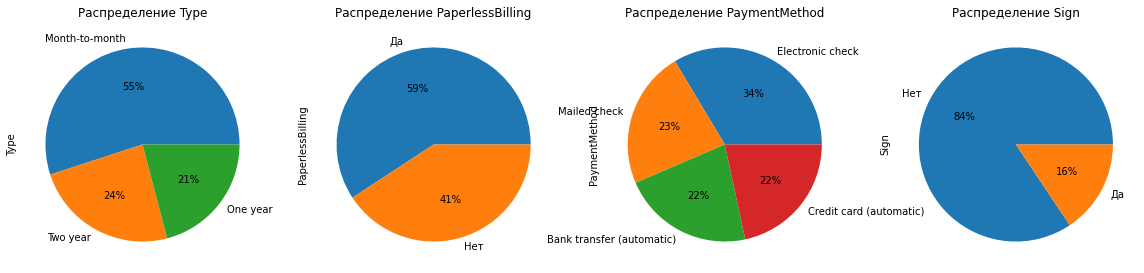

In [37]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
Type_count.plot(kind = 'pie', title = 'Распределение Type', autopct = '%1.0f%%')
plt.subplot(1, 4, 2)
PaperlessBilling_count.plot(kind = 'pie', title = 'Распределение PaperlessBilling', autopct = '%1.0f%%', labels=['Да', 'Нет'])
plt.subplot(1, 4, 3)
PaymentMethod_count.plot(kind = 'pie', title = 'Распределение PaymentMethod', autopct = '%1.0f%%')
plt.subplot(1, 4, 4)
Sign_count.plot(kind = 'pie', title = 'Распределение Sign', autopct = '%1.0f%%', labels=['Нет', 'Да']);

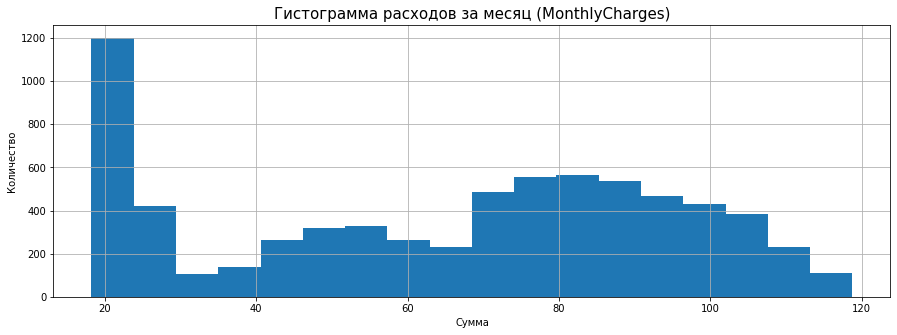

In [38]:
contract.MonthlyCharges.hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма расходов за месяц (MonthlyCharges)', size=15)
plt.xlabel('Сумма')
plt.ylabel('Количество')
plt.show();

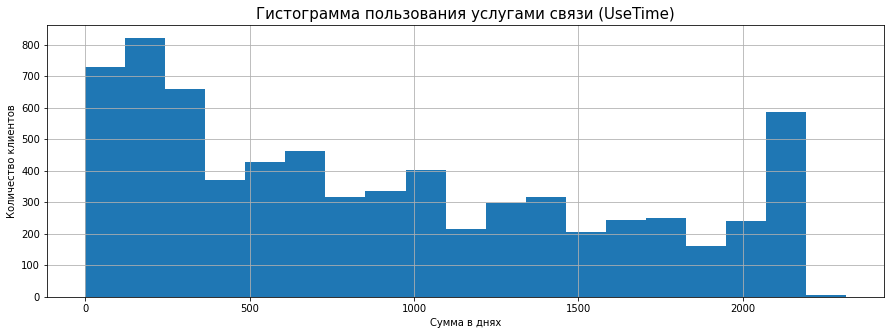

In [39]:
contract.UseTime.hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма пользования услугами связи (UseTime)', size=15)
plt.xlabel('Сумма в днях')
plt.ylabel('Количество клиентов')
plt.show();

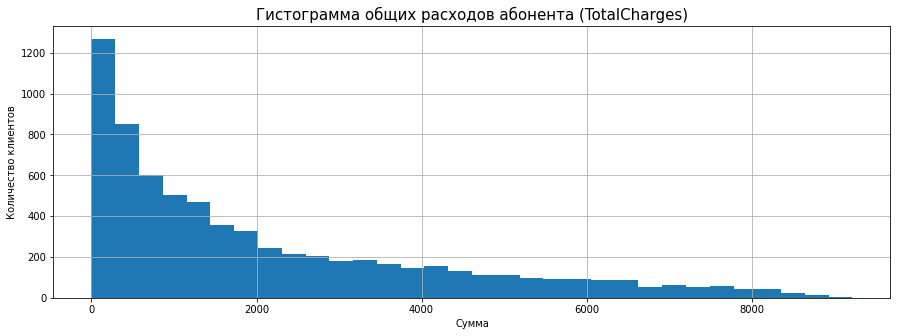

In [40]:
contract.TotalCharges.hist(bins='auto', figsize=(15,5))
plt.title('Гистограмма общих расходов абонента (TotalCharges)', size=15)
plt.xlabel('Сумма')
plt.ylabel('Количество клиентов')
plt.show();

In [41]:
contract.query('TotalCharges < 1000 ')

BeginDate  CustomerID    EndDate            Type PaperlessBilling  \
0    2020-01-01  7590-VHVEG 2020-02-01  Month-to-month              Yes   
2    2019-10-01  3668-QPYBK 2020-02-01  Month-to-month              Yes   
4    2019-09-01  9237-HQITU 2020-02-01  Month-to-month              Yes   
7    2019-04-01  6713-OKOMC 2020-02-01  Month-to-month               No   
10   2019-01-01  9763-GRSKD 2020-02-01  Month-to-month              Yes   
...         ...         ...        ...             ...              ...   
7030 2019-12-01  0871-OPBXW 2020-02-01  Month-to-month              Yes   
7032 2019-10-01  6894-LFHLY 2020-02-01  Month-to-month              Yes   
7036 2019-02-01  7750-EYXWZ 2020-02-01        One year               No   
7040 2019-03-01  4801-JZAZL 2020-02-01  Month-to-month              Yes   
7041 2019-07-01  8361-LTMKD 2020-02-01  Month-to-month              Yes   

         PaymentMethod  MonthlyCharges  TotalCharges  Sign  UseTime  
0     Electronic check           29.85         31.04     0       31  
2         Mailed check           53.85        226.17     0      123  
4     Electronic check           70.70        353.50     0      153  
7         Mailed check           29.75        300.48     0      306  
10        Mailed check           49.95        649.35     0      396  
...                ...             ...           ...   ...      ...  
7030      Mailed check           20.05         40.10     0       62  
7032  Electronic check           75.75        303.00     0      123  
7036  Electronic check           60.65        727.80     0      365  
7040  Electronic check           29.60        325.60     0      337  
7041      Mailed check           74.40        520.80     0      215  

[2965 rows x 10 columns]

In [42]:
aaa = 2965/7043*100
aaa

42.09853755501916

In [43]:
# переменная для phik
contract_phik = contract.drop('CustomerID', axis=1)

In [44]:
contract_phik.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'Sign', 'UseTime'])

BeginDate   EndDate      Type  PaperlessBilling  \
BeginDate          1.000000  0.548313  0.766249          0.081447   
EndDate            0.548313  1.000000  0.285429          0.062936   
Type               0.766249  0.285429  1.000000          0.106860   
PaperlessBilling   0.081447  0.062936  0.106860          1.000000   
PaymentMethod      0.456389  0.169262  0.277462          0.370495   
MonthlyCharges     0.421688  0.173224  0.388266          0.467783   
TotalCharges       0.774207  0.217670  0.470860          0.201703   
Sign               0.450254  1.000000  0.094015          0.083398   
UseTime            0.978521  0.396342  0.634155          0.026799   

                  PaymentMethod  MonthlyCharges  TotalCharges      Sign  \
BeginDate              0.456389        0.421688      0.774207  0.450254   
EndDate                0.169262        0.173224      0.217670  1.000000   
Type                   0.277462        0.388266      0.470860  0.094015   
PaperlessBilling       0.370495        0.467783      0.201703  0.083398   
PaymentMethod          1.000000        0.399536      0.335666  0.214832   
MonthlyCharges         0.399536        1.000000      0.711035  0.225925   
TotalCharges           0.335666        0.711035      1.000000  0.302890   
Sign                   0.214832        0.225925      0.302890  1.000000   
UseTime                0.350964        0.387579      0.848337  0.374569   

                   UseTime  
BeginDate         0.978521  
EndDate           0.396342  
Type              0.634155  
PaperlessBilling  0.026799  
PaymentMethod     0.350964  
MonthlyCharges    0.387579  
TotalCharges      0.848337  
Sign              0.374569  
UseTime           1.000000

Общие выводы:
* создан целевой признак Sign, где 0 человек продолжает пользоваться услугами, 1 - человек прекратил пользоваться услугами;
* создан новый признак UseTime показывающий сколько человек является/являлись абонентом;
* cтолбец BeginData приведен к типу даты, наименования No заменены на дату выгрузки датасетов (2020-02-01);
* распределение по признаку Type (тип оплаты: раз в год-два или ежемесячно): 55% оплачивают услуги кажды месяц, 24% раз в два года, 21% раз в год;
* распределение по признаку PaperlessBilling (электронный расчётный лист): 59% абонентов пользуются, 41% нет;
* распределение по признаку PaymentMethod (тип платежа): 31% используют электронный чек, 23% paymentMethod(любые платежные средства), 22% у Bank transfer и credit card;
* распределение Sign (перестал пользоваться услугами связи (целевой признак)) 84% продолжают, 16% прекратили;
* гистограмма расходов за месяц (MonthlyCharges) подтвердила, что большинство клиентов оплачивают услуги раз в месяц;
* гистограмма пользования услугами связи (UseTime) показала, что клиенты либо пользуются услугами меньше года и уходят, либо пользуются услугами больше 2000 дней;
* большинство клиентов принесло доход до 1000 у.е., что составляет 42%
* большая корреляционная связь у UseTime к BeginDate (97%), UseTime к TotalCharges (84%), TotalCharges к BeginDate (77%), TotalCharges к MonthlyCharges (71%); 
* пропуски не обнаружены.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Датасет исследован
</div>

#### Датасет personal

In [45]:
personal.head(3)

CustomerID  Gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No

In [46]:
#В данном датасете бинарные данные, предлагаю сразу перевести их в 1 или 0, чтобы в дальнейшем кодировщик не создавал новые столбцы
#personal['Gender'] = personal['Gender'].replace({'Female': '0', 'Male': '1'})
#personal['Partner'] = personal['Partner'].replace({'No': '0', 'Yes': '1'})
#personal['Dependents'] = personal['Dependents'].replace({'No': '0', 'Yes': '1'})

In [47]:
personal.nunique()

CustomerID       7043
Gender              2
SeniorCitizen       2
Partner             2
Dependents          2
dtype: int64

In [48]:
# временные переменные для создания графиков
Gender_count, SeniorCitizen_count, Partner_count,  Dependents_count = (
                                                                       count_all(personal, 'Gender'), 
                                                                       count_all(personal, 'SeniorCitizen'), 
                                                                       count_all(personal, 'Partner'), 
                                                                       count_all(personal, 'Dependents')
                                                                      ) 

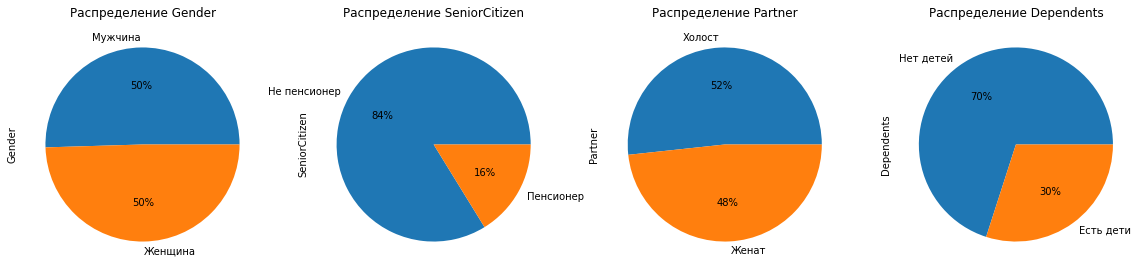

In [49]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 4, 1)
Gender_count.plot(kind = 'pie', title = 'Распределение Gender', autopct = '%1.0f%%', labels=['Мужчина', 'Женщина'])
plt.subplot(1, 4, 2)
SeniorCitizen_count.plot(kind = 'pie', title = 'Распределение SeniorCitizen', autopct = '%1.0f%%', labels=['Не пенсионер', 'Пенсионер'])
plt.subplot(1, 4, 3)
Partner_count.plot(kind = 'pie', title = 'Распределение Partner', autopct = '%1.0f%%', labels=['Холост', 'Женат'])
plt.subplot(1, 4, 4)
Dependents_count.plot(kind = 'pie', title = 'Распределение Dependents', autopct = '%1.0f%%', labels=['Нет детей', 'Есть дети']);

In [50]:
personal.iloc[:,1:].phik_matrix(interval_cols=['SeniorCitizen'])

Gender  SeniorCitizen   Partner  Dependents
Gender            1.0       0.000000  0.000000    0.000000
SeniorCitizen     0.0       1.000000  0.016992    0.324576
Partner           0.0       0.016992  1.000000    0.652122
Dependents        0.0       0.324576  0.652122    1.000000

Выводы по personal:
* Мужчин и женщин поровну;
* Пенсионеров 16% от общей массы;
* Замужних/женатых людей примерно поровну по отношению к незамужним/неженатым;
* Дети есть у 30% абонентов;
* Сильная корреляционная связь у Gender и Dependents, хорошая связь у Dependents и Partner (65%).

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Датасет internet

In [51]:
internet.head(3)

CustomerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No

In [52]:
internet.nunique()

CustomerID          5517
InternetService        2
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
dtype: int64

По аналогии с датасетом personal предлагаю сразу заменить на 1 и 0

In [53]:
# временные переменные для создания графиков
(
    OnlineSecurity_count, 
    OnlineBackup_count, 
    DeviceProtection_count, 
    TechSupport_count, 
    StreamingTV_count, 
    StreamingMovies_count
) = (
    count_all(internet, 'OnlineSecurity'), 
    count_all(internet, 'OnlineBackup'), 
    count_all(internet, 'DeviceProtection'), 
    count_all(internet, 'TechSupport'), 
    count_all(internet, 'StreamingTV'), 
    count_all(internet, 'StreamingMovies')
    ) 

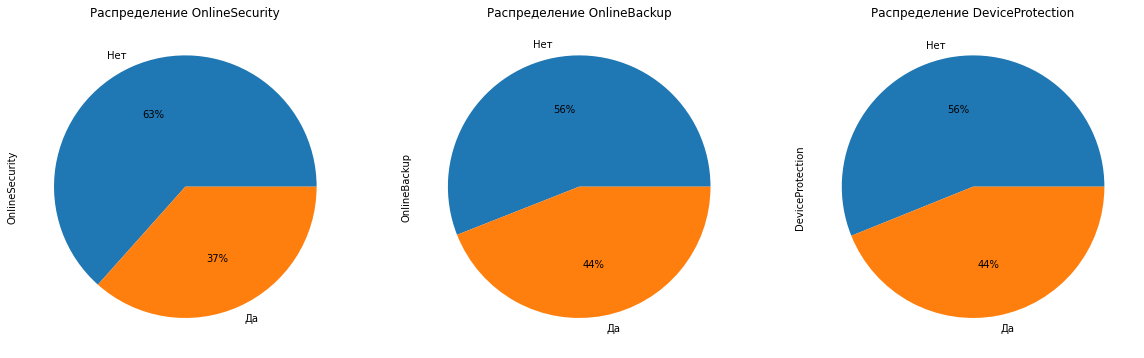

In [54]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
OnlineSecurity_count.plot(kind = 'pie', title = 'Распределение OnlineSecurity', autopct = '%1.0f%%', labels=['Нет', 'Да'])
plt.subplot(1, 3, 2)
OnlineBackup_count.plot(kind = 'pie', title = 'Распределение OnlineBackup', autopct = '%1.0f%%', labels=['Нет', 'Да'])
plt.subplot(1, 3, 3)
DeviceProtection_count.plot(kind = 'pie', title = 'Распределение DeviceProtection', autopct = '%1.0f%%', labels=['Нет', 'Да']);

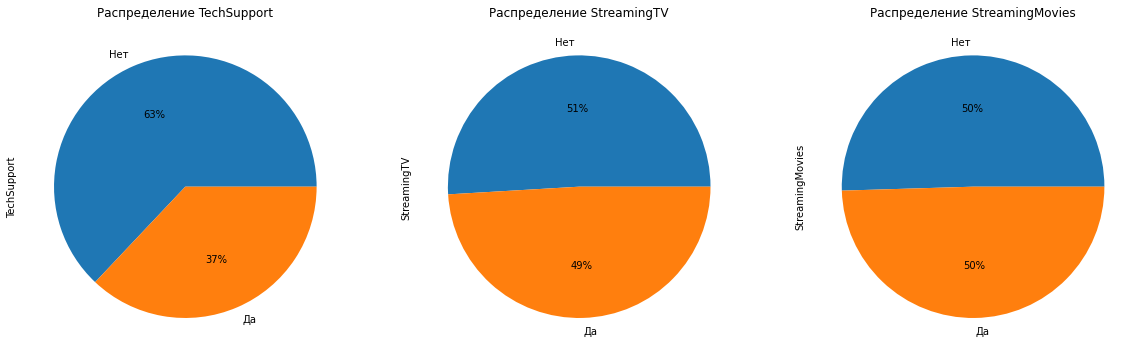

In [55]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
TechSupport_count.plot(kind = 'pie', title = 'Распределение TechSupport', autopct = '%1.0f%%', labels=['Нет', 'Да'])
plt.subplot(1, 3, 2)
StreamingTV_count.plot(kind = 'pie', title = 'Распределение StreamingTV', autopct = '%1.0f%%', labels=['Нет', 'Да'])
plt.subplot(1, 3, 3)
StreamingMovies_count.plot(kind = 'pie', title = 'Распределение StreamingMovies', autopct = '%1.0f%%', labels=['Нет', 'Да']);

In [56]:
internet.iloc[:,1:].phik_matrix()#interval_cols=[''])

InternetService  OnlineSecurity  OnlineBackup  \
InternetService          1.000000        0.341950      0.008098   
OnlineSecurity           0.341950        1.000000      0.277245   
OnlineBackup             0.008098        0.277245      1.000000   
DeviceProtection         0.000000        0.263021      0.285491   
TechSupport              0.326553        0.415484      0.293663   
StreamingTV              0.260564        0.065004      0.227275   
StreamingMovies          0.246018        0.084426      0.211500   

                  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  
InternetService           0.000000     0.326553     0.260564         0.246018  
OnlineSecurity            0.263021     0.415484     0.065004         0.084426  
OnlineBackup              0.285491     0.293663     0.227275         0.211500  
DeviceProtection          1.000000     0.360774     0.420014         0.437634  
TechSupport               0.360774     1.000000     0.249535         0.250349  
StreamingTV               0.420014     0.249535     1.000000         0.630406  
StreamingMovies           0.437634     0.250349     0.630406         1.000000

Выводы:
* Хорошая корреляционная связь между StreamingMovies и StreamingTV (63%);
* Распределение по данным каждого столбца указаны на графиках, подробно расписывать не вижу смысла, особо ничего не выделяется, всё примерно пополам.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

#### Датасет phone

In [57]:
phone.head(3)

CustomerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No

In [58]:
phone.nunique()

CustomerID       6361
MultipleLines       2
dtype: int64

In [59]:
# временные переменные для создания графиков
MultipleLines_count = count_all(phone, 'MultipleLines')

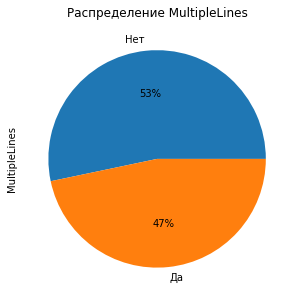

In [60]:
plt.figure(figsize=(10, 5))
MultipleLines_count.plot(kind = 'pie', title = 'Распределение MultipleLines', autopct = '%1.0f%%', labels=['Нет', 'Да']);

Выводы:
* распределение примерно 53% на 47%.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Объединение данных

Объединим все 4 датасета в один для дальнейшей работы, более информативным и важным считаю датасет contract, поэтому предлагаю к нему присоединять остальные датасеты по очереди, за ключевое поле возьмем столбец CustomerID

In [61]:
data = contract.merge(personal, how='left', on='CustomerID')
data = data.merge(internet, how='left', on='CustomerID')
data = data.merge(phone, how='left', on='CustomerID')

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Выбран правильный тип и порядок объединения
</div>

In [62]:
general_info(data)

BeginDate  CustomerID    EndDate            Type PaperlessBilling  \
0 2020-01-01  7590-VHVEG 2020-02-01  Month-to-month              Yes   
1 2017-04-01  5575-GNVDE 2020-02-01        One year               No   
2 2019-10-01  3668-QPYBK 2020-02-01  Month-to-month              Yes   
3 2016-05-01  7795-CFOCW 2020-02-01        One year               No   
4 2019-09-01  9237-HQITU 2020-02-01  Month-to-month              Yes   
5 2019-03-01  9305-CDSKC 2020-02-01  Month-to-month              Yes   
6 2018-04-01  1452-KIOVK 2020-02-01  Month-to-month              Yes   
7 2019-04-01  6713-OKOMC 2020-02-01  Month-to-month               No   
8 2017-07-01  7892-POOKP 2020-02-01  Month-to-month              Yes   
9 2014-12-01  6388-TABGU 2017-05-01        One year               No   

               PaymentMethod  MonthlyCharges  TotalCharges  Sign  UseTime  \
0           Electronic check           29.85         31.04     0       31   
1               Mailed check           56.95       2071.84     0     1036   
2               Mailed check           53.85        226.17     0      123   
3  Bank transfer (automatic)           42.30       1960.60     0     1371   
4           Electronic check           70.70        353.50     0      153   
5           Electronic check           99.65       1150.96     0      337   
6    Credit card (automatic)           89.10       2058.21     0      671   
7               Mailed check           29.75        300.48     0      306   
8           Electronic check          104.80       3573.68     0      945   
9  Bank transfer (automatic)           56.15       1628.35     1      882   

   ... Partner  Dependents InternetService OnlineSecurity OnlineBackup  \
0  ...     Yes          No             DSL             No          Yes   
1  ...      No          No             DSL            Yes           No   
2  ...      No          No             DSL            Yes          Yes   
3  ...      No          No             DSL            Yes           No   
4  ...      No          No     Fiber optic             No           No   
5  ...      No          No     Fiber optic             No           No   
6  ...      No         Yes     Fiber optic             No          Yes   
7  ...      No          No             DSL            Yes           No   
8  ...     Yes          No     Fiber optic             No           No   
9  ...      No         Yes             DSL            Yes          Yes   

  DeviceProtection TechSupport StreamingTV StreamingMovies MultipleLines  
0               No          No          No              No           NaN  
1              Yes          No          No              No            No  
2               No          No          No              No            No  
3              Yes         Yes          No              No           NaN  
4               No          No          No              No            No  
5              Yes          No         Yes             Yes           Yes  
6               No          No         Yes              No           Yes  
7               No          No          No              No           NaN  
8              Yes         Yes         Yes             Yes           Yes  
9               No          No          No              No            No  

[10 rows x 22 columns]

-------------------------------INFO-----------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   CustomerID        7043 non-null   object        
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Sign              7043 non-null   int64         
 9   UseTime           7043 non-null   int64         
 10  Gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Depende

None

-------------------------------DESCRIBE-------------------------------


count         mean          std    min      5%     25%  \
MonthlyCharges  7043.0    64.761692    30.090047  18.25  19.650   35.50   
TotalCharges    7043.0  2115.312885  2112.742814   0.00  75.105  436.75   
Sign            7043.0     0.156325     0.363189   0.00   0.000    0.00   
UseTime         7043.0   898.555729   683.130510   0.00  62.000  276.00   
SeniorCitizen   7043.0     0.162147     0.368612   0.00   0.000    0.00   

                    50%      75%       95%      max  
MonthlyCharges    70.35    89.85   107.400   118.75  
TotalCharges    1343.35  3236.69  6630.147  9221.38  
Sign               0.00     0.00     1.000     1.00  
UseTime          761.00  1461.00  2163.000  2314.00  
SeniorCitizen      0.00     0.00     1.000     1.00

Видны пропуски по нескольким столбцам, скорей всего это случилось из-за того, что не все пользователи используют все услуги.

In [63]:
data.isnull().sum()

BeginDate              0
CustomerID             0
EndDate                0
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges           0
Sign                   0
UseTime                0
Gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
InternetService     1526
OnlineSecurity      1526
OnlineBackup        1526
DeviceProtection    1526
TechSupport         1526
StreamingTV         1526
StreamingMovies     1526
MultipleLines        682
dtype: int64

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Меня смущает, что везде одинаковое количество пропусков - 1526
</div>

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Да, это так, а почему такое могло случится? В каком датасете были эти признаки? Совпадали размеры датасетов? Что произошло при левом объединении? Без понимания природы признаков не получится корректно их заполнить
</div>

<div class="alert alert-info">
<h2> Комментарий студента v2<a class="tocSkip"> </h2>

Я понял, в двух датасетах меньше записей, совсем вылетело из головы, благодарю.
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно))) Может нужно немного отдыхать? У тебя все хорошо получается
    
</div>

In [64]:
bool_series = pd.isnull(data["DeviceProtection"])
data[bool_series]

BeginDate  CustomerID    EndDate            Type PaperlessBilling  \
11   2018-10-01  7469-LKBCI 2020-02-01        Two year               No   
16   2015-10-01  8191-XWSZG 2020-02-01        One year               No   
21   2019-02-01  1680-VDCWW 2020-02-01        One year               No   
22   2019-11-01  1066-JKSGK 2020-02-01  Month-to-month               No   
33   2020-01-01  7310-EGVHZ 2020-02-01  Month-to-month               No   
...         ...         ...        ...             ...              ...   
7017 2015-11-01  4807-IZYOZ 2020-02-01        Two year               No   
7019 2016-11-01  9710-NJERN 2020-02-01        Two year               No   
7020 2019-02-01  9837-FWLCH 2020-02-01  Month-to-month              Yes   
7030 2019-12-01  0871-OPBXW 2020-02-01  Month-to-month              Yes   
7037 2014-02-01  2569-WGERO 2020-02-01        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges  Sign  UseTime  \
11      Credit card (automatic)           18.95        312.30     0      488   
16                 Mailed check           20.65       1106.01     0     1584   
21    Bank transfer (automatic)           19.80        237.60     0      365   
22                 Mailed check           20.15         61.05     0       92   
33    Bank transfer (automatic)           20.20         22.22     0       31   
...                         ...             ...           ...   ...      ...   
7017  Bank transfer (automatic)           20.65       1053.15     0     1553   
7019               Mailed check           20.15        785.85     0     1187   
7020           Electronic check           19.20        246.53     0      365   
7030               Mailed check           20.05         40.10     0       62   
7037  Bank transfer (automatic)           21.15       1553.26     0     2191   

      ... Partner  Dependents InternetService OnlineSecurity OnlineBackup  \
11    ...      No          No             NaN            NaN          NaN   
16    ...      No          No             NaN            NaN          NaN   
21    ...     Yes          No             NaN            NaN          NaN   
22    ...      No          No             NaN            NaN          NaN   
33    ...      No          No             NaN            NaN          NaN   
...   ...     ...         ...             ...            ...          ...   
7017  ...      No          No             NaN            NaN          NaN   
7019  ...      No          No             NaN            NaN          NaN   
7020  ...     Yes         Yes             NaN            NaN          NaN   
7030  ...      No          No             NaN            NaN          NaN   
7037  ...      No          No             NaN            NaN          NaN   

     DeviceProtection TechSupport StreamingTV StreamingMovies MultipleLines  
11                NaN         NaN         NaN             NaN            No  
16                NaN         NaN         NaN             NaN            No  
21                NaN         NaN         NaN             NaN            No  
22                NaN         NaN         NaN             NaN            No  
33                NaN         NaN         NaN             NaN            No  
...               ...         ...         ...             ...           ...  
7017              NaN         NaN         NaN             NaN            No  
7019              NaN         NaN         NaN             NaN            No  
7020              NaN         NaN         NaN             NaN            No  
7030              NaN         NaN         NaN             NaN            No  
7037              NaN         NaN         NaN             NaN            No  

[1526 rows x 22 columns]

Если люди не пользуются услугами, предлагаю заменить пустые значения на No

<div class="alert alert-warning">
<b>🤔 Рекомендация:</b> Значение No используется если не подключена конкретная услуга, но подключен интерент или телефон. Заполнение всех пропусков этим значением не даст различий между этими данными
</div>

In [65]:
data = data.fillna('No')

In [66]:
data.isnull().sum()

BeginDate           0
CustomerID          0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Sign                0
UseTime             0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

пустых значений больше нет

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Исследовательский анализ и предобработка данных объединённого датафрейма

In [67]:
data.head(3)

BeginDate  CustomerID    EndDate            Type PaperlessBilling  \
0 2020-01-01  7590-VHVEG 2020-02-01  Month-to-month              Yes   
1 2017-04-01  5575-GNVDE 2020-02-01        One year               No   
2 2019-10-01  3668-QPYBK 2020-02-01  Month-to-month              Yes   

      PaymentMethod  MonthlyCharges  TotalCharges  Sign  UseTime  ... Partner  \
0  Electronic check           29.85         31.04     0       31  ...     Yes   
1      Mailed check           56.95       2071.84     0     1036  ...      No   
2      Mailed check           53.85        226.17     0      123  ...      No   

   Dependents InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0          No             DSL             No          Yes               No   
1          No             DSL            Yes           No              Yes   
2          No             DSL            Yes          Yes               No   

  TechSupport StreamingTV StreamingMovies MultipleLines  
0          No          No              No            No  
1          No          No              No            No  
2          No          No              No            No  

[3 rows x 22 columns]

Предлагаю более подробно рассмотреть отток клиентов.

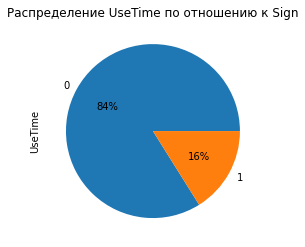

In [68]:
sign_counts = data.groupby('Sign')['UseTime'].sum()
sign_counts.plot(kind='pie', title = 'Распределение UseTime по отношению к Sign', autopct = '%1.0f%%');

In [69]:
data_corr = data.drop(['CustomerID'], axis=1)

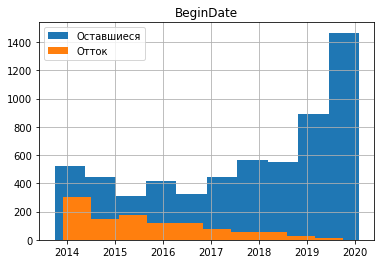

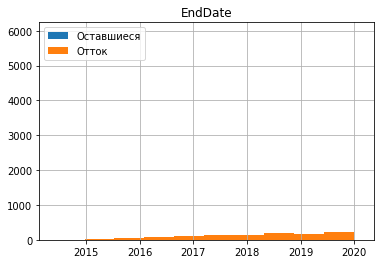

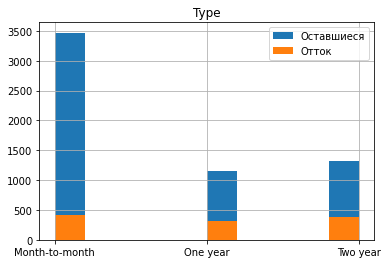

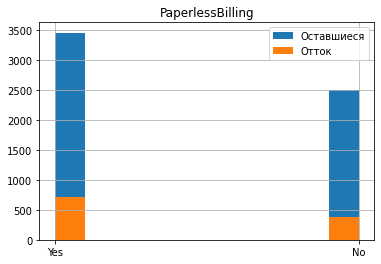

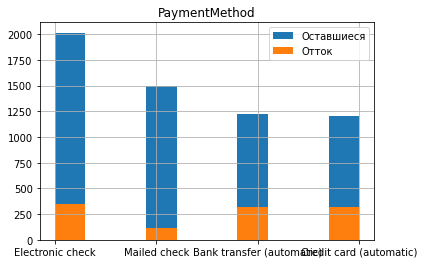

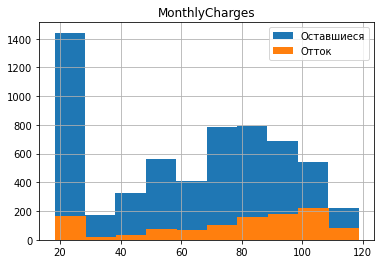

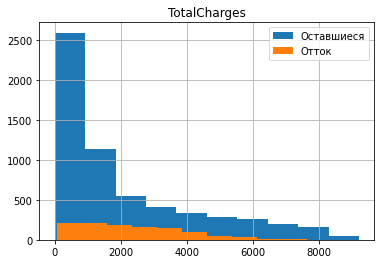

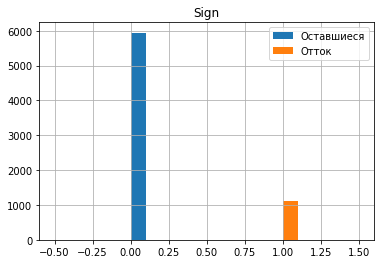

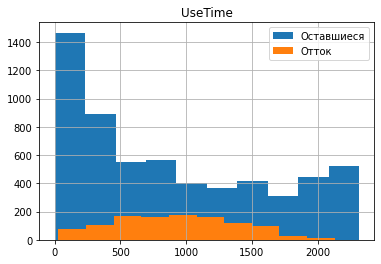

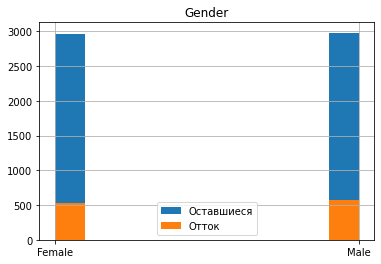

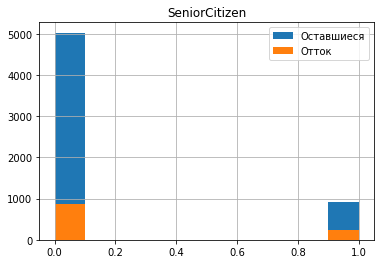

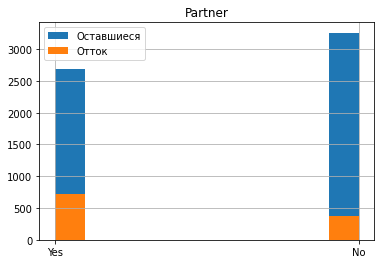

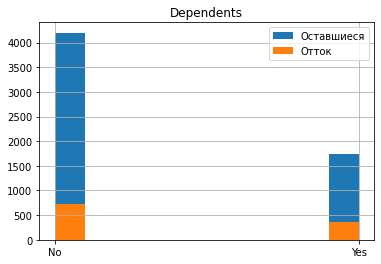

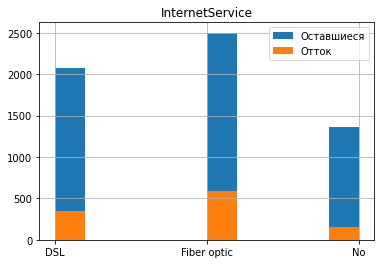

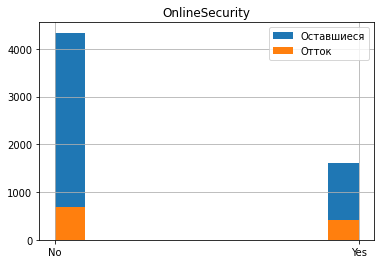

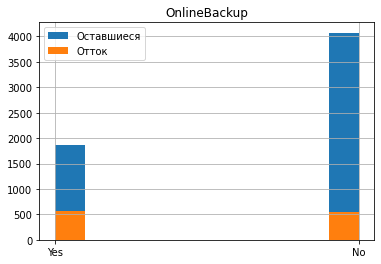

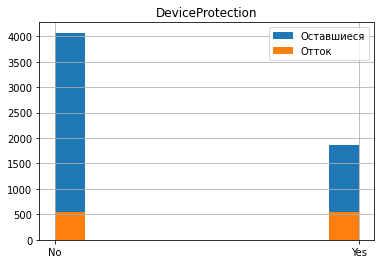

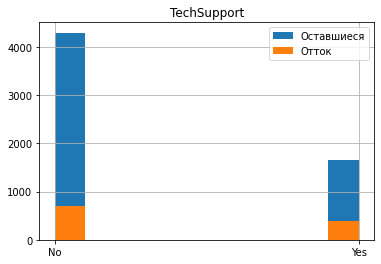

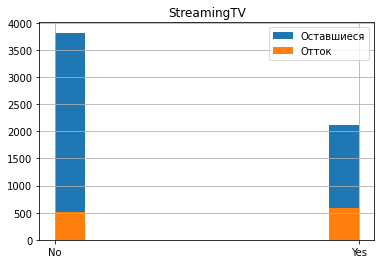

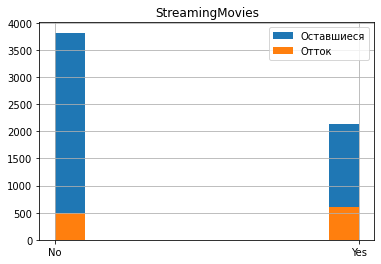

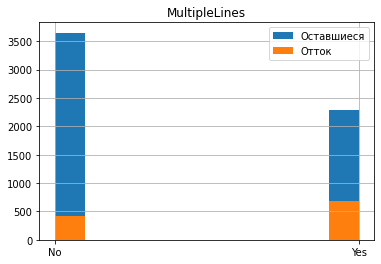

In [70]:
for column in data_corr.columns:
    data_corr.groupby('Sign')[column].hist()
    plt.title(column)
    plt.legend(['Оставшиеся', 'Отток'])
    plt.show()

Выводы:
* со временем люди начинают меньше отказываться от услуг связи, особенно начиная с 2017 года;
* Отток клиентов не особо зависит от типа оплаты, уходят примерно одинаково;
* Клиенты с электронным расчетным листом чаще отказываются от услуг;
* Чаще всего уходят люди с типом платежа электронный чек;
* TotalCharges показывает, что в основном уходят клиенты, которые только начали пользоваться услугами связи;
* Целевой признак разделен 1 к 6;
* Время пользования услугами показывает, что в среднем уходят до 1500 дней;
* Мужчины и женщины одинакого уходят, разницы особо нет;
* Пенсионеров в пять раз меньше и общее количество тех кто ушел также намного меньше;
* Чаще уходят люди состоящие в браке;
* Чаще уходят люди без детей;
* Клиентов с подключение DSL и оптоволокно примерно одинаково, но чаще уходят люди со вторым типом подключения;
* Все дополнительные опции показывают одинаковое распределение по оттоку клиентов, особо не влияют.

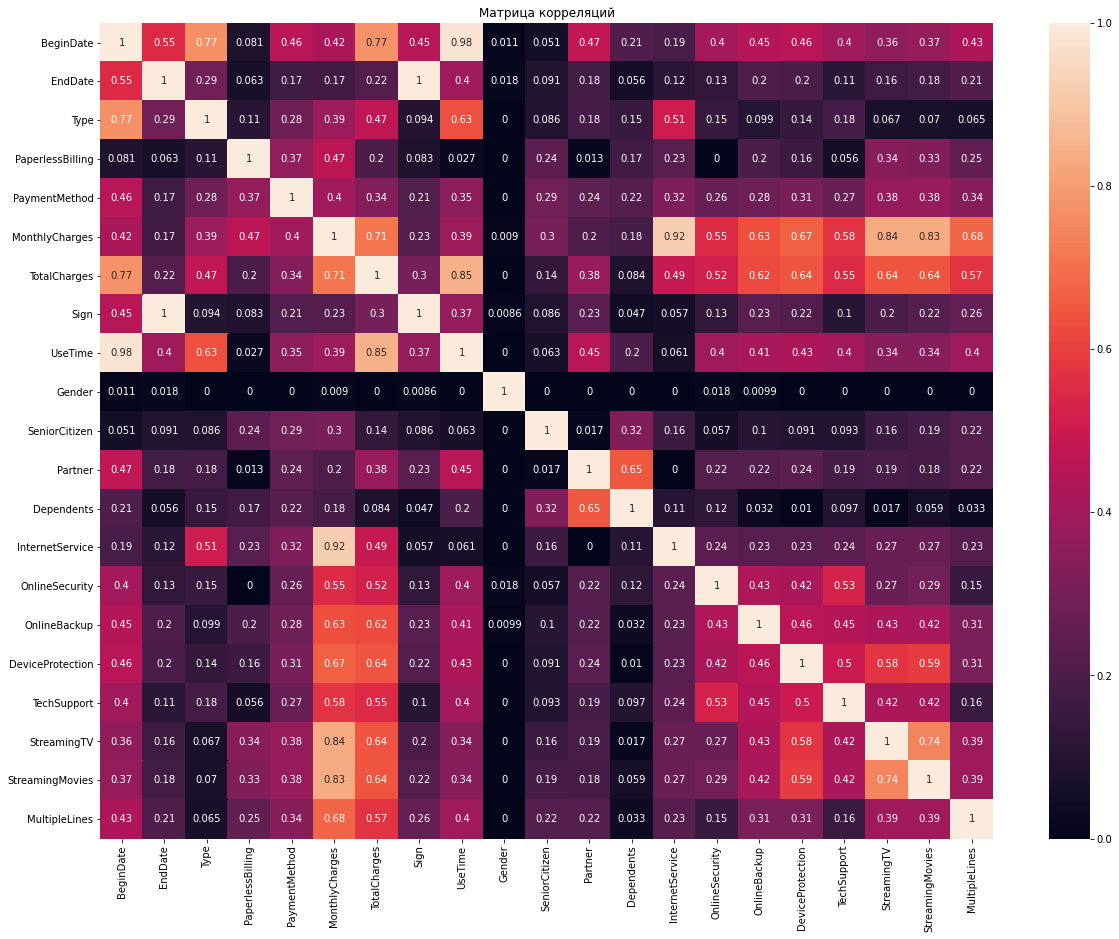

In [71]:
plt.figure(figsize=(20,15))
sns.heatmap(data = data_corr.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'Sign', 'UseTime', 'SeniorCitizen']), annot=True)
plt.title('Матрица корреляций')
plt.show()

Обнаружены мультиколлинеарные признаки целевого признака - EndDate, низкую корреляцию имеют следующие фичи: PaperlessBilling (0,083), Type (0.094), Gender (0.0086), SeniorSitizen (0.086). Так же сильную корреляционную связь имеют следующие столбцы UseTime и BeginDate. \
От данных признаков лучше всего избавиться, потому что они имеют сильную линейную зависимость и могут плохо повлиять на обучение модели, предлагаю проверить отдельно на наших моделях ниже.


<div class="alert alert-danger">
<s><b>😔 Необходимо исправить:</b> Здесь долен быть более подробный вывод, что увидели на графиках выше? На тепловой карте? Какие признаки мультиколлениарны и что с этим делать?</s>
</div>

<div class="alert alert-info">
<h2> Комментарий студента v2<a class="tocSkip"> </h2>

Поправил. А так же добавил пункт 9 с доп. исследованием.
</div>

<div class="alert alert-success">
<b>👍 Успех:</b> Отлично получилось!
</div>

### Подготовка данных

In [72]:
def standard_scaler(X_train, X_test, num_col_names, scaler):
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

    return X_train_scaled, X_test_scaled

In [73]:
def normal_encoder(X_train, X_test, encoder):
    X_train_ohe = encoder.fit_transform(X_train)
    X_test_ohe = encoder.transform(X_test)

    encoder_col_names = encoder.get_feature_names()

    X_train_ohe = pd.DataFrame(X_train_ohe, columns=encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)
    return X_train_ohe, X_test_ohe

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   CustomerID        7043 non-null   object        
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Sign              7043 non-null   int64         
 9   UseTime           7043 non-null   int64         
 10  Gender            7043 non-null   object        
 11  SeniorCitizen     7043 non-null   int64         
 12  Partner           7043 non-null   object        
 13  Dependents        7043 non-null   object        
 14  InternetService   7043 n

Удаляем столбцы с датой и CustomerID, они негативно повлияют на обучение моделей

In [75]:
df = data.drop(['BeginDate', 'EndDate', 'CustomerID'], axis=1)

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [76]:
df.head(1)

Type PaperlessBilling     PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes  Electronic check           29.85   

   TotalCharges  Sign  UseTime  Gender  SeniorCitizen Partner Dependents  \
0         31.04     0       31  Female              0     Yes         No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   

  StreamingTV StreamingMovies MultipleLines  
0          No              No            No

In [77]:
num_col_names = ['MonthlyCharges', 'TotalCharges', 'UseTime']
encoder_col_names = ['Type', 'PaperlessBilling', 'PaymentMethod',
                     'InternetService', 'OnlineSecurity',
                     'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'MultipleLines', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents']

In [78]:
X = df.drop(['Sign'], axis=1)
y = df['Sign']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [80]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(5282, 18)

(1761, 18)

(5282,)

(1761,)

In [81]:
X_train_ohe, X_test_ohe = normal_encoder(X_train[encoder_col_names], X_test[encoder_col_names], encoder)

In [82]:
#X_train_ohe = pd.get_dummies(X_train, drop_first=True)
#X_test_ohe = pd.get_dummies(X_test, drop_first=True)

In [83]:
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test, num_col_names, scaler) 

In [84]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)

In [85]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(5282, 22)

(1761, 22)

(5282,)

(1761,)

In [86]:
X_train.head(3)

x0_One year  x0_Two year  x1_Yes  x2_Credit card (automatic)  \
0          1.0          0.0     1.0                         0.0   
1          0.0          0.0     1.0                         0.0   
2          0.0          0.0     1.0                         0.0   

   x2_Electronic check  x2_Mailed check  x3_Fiber optic  x3_No  x4_Yes  \
0                  0.0              0.0             1.0    0.0     0.0   
1                  1.0              0.0             1.0    0.0     0.0   
2                  0.0              1.0             0.0    0.0     0.0   

   x5_Yes  ...  x8_Yes  x9_Yes  x10_Yes  x11_Male  x12_1  x13_Yes  x14_Yes  \
0     1.0  ...     1.0     1.0      1.0       0.0    0.0      0.0      0.0   
1     1.0  ...     1.0     0.0      1.0       0.0    1.0      1.0      0.0   
2     1.0  ...     0.0     0.0      0.0       1.0    0.0      0.0      0.0   

   MonthlyCharges  TotalCharges   UseTime  
0        1.339649     -0.461626 -0.864882  
1        0.774381      1.065471  0.732455  
2       -0.366129     -0.683254 -0.774604  

[3 rows x 22 columns]

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно! Молодец, что проверяешь данные после кодирования и масштабирования
</div>

### Обучение моделей машинного обучения

#### Модель LogisticRegression

In [87]:
%%time
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

model_lr = LogisticRegression(n_jobs=-1, random_state=RANDOM_STATE)

search_lr = GridSearchCV(model_lr, param_grid, cv=3, scoring='roc_auc', verbose = False)
search_lr.fit(X_train, y_train)

print('Лучшие параметры:', search_lr.best_params_)
print('Лучший результат:', search_lr.best_score_)

Лучшие параметры: {'C': 100}
Лучший результат: 0.7705688271871881
CPU times: user 3.46 s, sys: 2.97 s, total: 6.43 s
Wall time: 6.4 s


In [88]:
predict_lr = search_lr.best_estimator_.predict_proba(X_train)[:, 1]

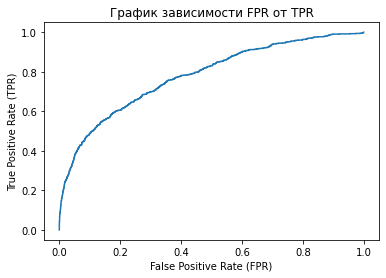

In [89]:
fpr, tpr, thresholds = roc_curve(y_train, predict_lr)  
plt.plot(fpr, tpr)     
plt.title("График зависимости FPR от TPR")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

Метрика ROC-AUC на тренировочной выборке составила 0.77

#### Модель CatBoostClassifier

In [90]:
model_cb = CatBoostClassifier(random_state = RANDOM_STATE)

In [91]:
param_cb = {'depth':[5,10], 'learning_rate':np.arange(0.1,1,0.2)}

In [92]:
grid_cb = GridSearchCV(estimator=model_cb, param_grid=param_cb, cv=3, scoring='roc_auc')

In [93]:
%%time
grid_cb.fit(X_train, y_train)

0:	learn: 0.6277483	total: 49.3ms	remaining: 49.2s
1:	learn: 0.5754764	total: 51.9ms	remaining: 25.9s
2:	learn: 0.5279324	total: 54.1ms	remaining: 18s
3:	learn: 0.4851295	total: 56.4ms	remaining: 14s
4:	learn: 0.4580325	total: 58.3ms	remaining: 11.6s
5:	learn: 0.4324161	total: 59.8ms	remaining: 9.91s
6:	learn: 0.4159953	total: 61.2ms	remaining: 8.69s
7:	learn: 0.4033111	total: 62.8ms	remaining: 7.78s
8:	learn: 0.3905584	total: 64.3ms	remaining: 7.08s
9:	learn: 0.3838156	total: 66ms	remaining: 6.53s
10:	learn: 0.3746004	total: 67.9ms	remaining: 6.11s
11:	learn: 0.3683627	total: 69.4ms	remaining: 5.72s
12:	learn: 0.3648276	total: 71.1ms	remaining: 5.39s
13:	learn: 0.3607455	total: 72.6ms	remaining: 5.11s
14:	learn: 0.3553494	total: 74.3ms	remaining: 4.88s
15:	learn: 0.3496366	total: 75.8ms	remaining: 4.66s
16:	learn: 0.3449436	total: 77.3ms	remaining: 4.47s
17:	learn: 0.3408872	total: 78.8ms	remaining: 4.3s
18:	learn: 0.3377902	total: 80.4ms	remaining: 4.15s
19:	learn: 0.3352217	total: 8

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd329891f10>,
             param_grid={'depth': [5, 10],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='roc_auc')

In [94]:
pred_cb = grid_cb.best_estimator_.predict(X_train)

In [95]:
print('Лучший результат:', grid_cb.best_score_)

Лучший результат: 0.9042295032127758


### Выбор лучшей модели

Лучшую метрику показала модель CatBoostClassifier, проверим на тестовой выборке

<div class="alert alert-success">
<b>👍 Успех:</b> Лучшая модель выбрана!
</div>

In [96]:
predict_cb = grid_cb.best_estimator_.predict_proba(X_test)[:, 1]

In [97]:
print(f'Метрика ROC-AUC на тестовой выборке: {round(roc_auc_score(y_test, predict_cb),3)}')

Метрика ROC-AUC на тестовой выборке: 0.927


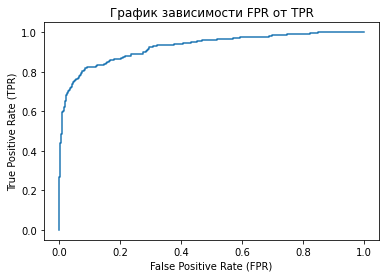

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, predict_cb)   
plt.plot(fpr, tpr)     
plt.title("График зависимости FPR от TPR")
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

In [99]:
main_sign = pd.DataFrame(grid_cb.best_estimator_.feature_importances_, index = X_test.columns, columns=['MainSign'])
main_sign = main_sign.sort_values(by='MainSign', ascending=False)
main_sign.iloc[:10]

MainSign
UseTime         45.721627
TotalCharges    12.568887
MonthlyCharges  11.747341
x0_Two year      3.844109
x13_Yes          3.058525
x0_One year      2.326726
x5_Yes           2.132742
x10_Yes          1.818697
x1_Yes           1.813375
x14_Yes          1.764537

Самые важные признаки влияющие на результат - UseTime, TotalCharges, MonthlyCharges.

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

In [100]:
y_pred = grid_cb.best_estimator_.predict(X_test)

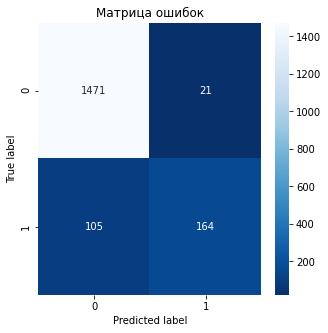

In [101]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (5,5))
plt.title("Матрица ошибок")
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.xlabel('Predicted label')
plt.ylabel('True label');

истинно положительный (TP) - 1471 \
истинно отрицательный (TN) - 164 \
ложноположительный результат (FP), ошибка I рода - 21 \
ложноотрицательный результат (FN), ошибка II рода 105 

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Общий вывод и рекомендации заказчику

В данном проекте мы разработали модель по предсказанию перестанет ли клиент пользоваться услугами связи сотовой связи или нет. На входе получили 4 датасета с общий ключевым полем customerID. Далее проделали следующую работу: 
* Провели предобработку данных: привели наименования к стандарту PEP 8, заполнили пропуски, проверили дубликаты, изменили типы данных. Провели исследователький анализ, обозначили общие выводы. 
* Добавили новый столбец UseTime  с общим временем пользования услугами связи, увидили что он имеет хорошую корреляцию с целевым признаком и является хорошим признаком для обучения моделей.  
* Объединили все датасеты в общий, заполнили пропущенные значения на 0. 
* Подготовили данные для обучения моделей, удалили лишние признаки. 
* Обучили две модели с подбором гипперпараметров - линейную классификацию и CatBoostClassifier.
* Лучший результат показала модель CatBoostClassifier со значением метрики ROC-AUC в 90%

<div class="alert alert-success">
<b>👍 Успех:</b> Все верно!
</div>

### Дополнительная проверка на важных признаках

In [102]:
col_main = ['UseTime', 'TotalCharges', 'MonthlyCharges', 'x0_Two year', 'x13_Yes', 'x0_One year', 'x5_Yes', 'x10_Yes', 'x1_Yes', 'x14_Yes']

In [103]:
search_lr.fit(X_train[col_main], y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=190224),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc',
             verbose=False)

In [104]:
print('Лучшие параметры:', search_lr.best_params_)
print('Лучший результат:', search_lr.best_score_)

Лучшие параметры: {'C': 10}
Лучший результат: 0.7551360953189762


In [105]:
%%time
grid_cb.fit(X_train[col_main], y_train)

0:	learn: 0.6165236	total: 1.4ms	remaining: 1.4s
1:	learn: 0.5565981	total: 2.83ms	remaining: 1.41s
2:	learn: 0.5156726	total: 4.04ms	remaining: 1.34s
3:	learn: 0.4779694	total: 5.31ms	remaining: 1.32s
4:	learn: 0.4520440	total: 6.6ms	remaining: 1.31s
5:	learn: 0.4309960	total: 7.9ms	remaining: 1.31s
6:	learn: 0.4142470	total: 9.15ms	remaining: 1.3s
7:	learn: 0.4028281	total: 10.4ms	remaining: 1.29s
8:	learn: 0.3898059	total: 11.7ms	remaining: 1.28s
9:	learn: 0.3807246	total: 12.9ms	remaining: 1.28s
10:	learn: 0.3720508	total: 14.1ms	remaining: 1.27s
11:	learn: 0.3661826	total: 15.5ms	remaining: 1.27s
12:	learn: 0.3599773	total: 16.8ms	remaining: 1.28s
13:	learn: 0.3535169	total: 18ms	remaining: 1.27s
14:	learn: 0.3501621	total: 19.4ms	remaining: 1.27s
15:	learn: 0.3461263	total: 20.7ms	remaining: 1.27s
16:	learn: 0.3424318	total: 21.9ms	remaining: 1.27s
17:	learn: 0.3402428	total: 23.3ms	remaining: 1.27s
18:	learn: 0.3387183	total: 24.6ms	remaining: 1.27s
19:	learn: 0.3362110	total: 2

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd329891f10>,
             param_grid={'depth': [5, 10],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='roc_auc')

In [106]:
pred_cb = grid_cb.best_estimator_.predict(X_train)
print('Лучший результат:', grid_cb.best_score_)

Лучший результат: 0.907805114551192


На модели LogisticRegression метрика стала чуть хуже, но на Catboost улучшилась. И стало намного быстрее считать!!!

Предлагаю проверить на признаках из корреляции.

In [107]:
X_train.head(1)

x0_One year  x0_Two year  x1_Yes  x2_Credit card (automatic)  \
0          1.0          0.0     1.0                         0.0   

   x2_Electronic check  x2_Mailed check  x3_Fiber optic  x3_No  x4_Yes  \
0                  0.0              0.0             1.0    0.0     0.0   

   x5_Yes  ...  x8_Yes  x9_Yes  x10_Yes  x11_Male  x12_1  x13_Yes  x14_Yes  \
0     1.0  ...     1.0     1.0      1.0       0.0    0.0      0.0      0.0   

   MonthlyCharges  TotalCharges   UseTime  
0        1.339649     -0.461626 -0.864882  

[1 rows x 22 columns]

In [108]:
col_main_corr = ['PaymentMethod', 
                 'Partner', 'OnlineSecurity', 
                 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'MultipleLines']

In [109]:
num_col_names = ['MonthlyCharges', 'TotalCharges', 'UseTime']

In [110]:
X = df.drop(['Sign'], axis=1)
y = df['Sign']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [112]:
X_train_ohe, X_test_ohe = normal_encoder(X_train[col_main_corr], X_test[col_main_corr], encoder)

In [113]:
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test, num_col_names, scaler) 

In [114]:
X_train = pd.concat([X_train_ohe, X_train_scaled], axis=1).reset_index(drop=True)
X_test = pd.concat([X_test_ohe, X_test_scaled], axis=1).reset_index(drop=True)

In [115]:
X_train.head(2)

x0_Credit card (automatic)  x0_Electronic check  x0_Mailed check  x1_Yes  \
0                         0.0                  0.0              0.0     0.0   
1                         0.0                  1.0              0.0     1.0   

   x2_Yes  x3_Yes  x4_Yes  x5_Yes  x6_Yes  x7_Yes  MonthlyCharges  \
0     0.0     1.0     0.0     1.0     1.0     1.0        1.339649   
1     0.0     1.0     0.0     1.0     0.0     1.0        0.774381   

   TotalCharges   UseTime  
0     -0.461626 -0.864882  
1      1.065471  0.732455

In [116]:
search_lr.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(n_jobs=-1, random_state=190224),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc',
             verbose=False)

In [117]:
print('Лучшие параметры:', search_lr.best_params_)
print('Лучший результат:', search_lr.best_score_)

Лучшие параметры: {'C': 1}
Лучший результат: 0.7406221042107445


метрика LogisticRegression стала еще хуже.

In [118]:
%%time
grid_cb.fit(X_train, y_train)

0:	learn: 0.6239328	total: 1.37ms	remaining: 1.37s
1:	learn: 0.5660792	total: 2.78ms	remaining: 1.39s
2:	learn: 0.5214656	total: 3.96ms	remaining: 1.31s
3:	learn: 0.4846273	total: 5.14ms	remaining: 1.28s
4:	learn: 0.4589289	total: 6.5ms	remaining: 1.29s
5:	learn: 0.4401354	total: 7.78ms	remaining: 1.29s
6:	learn: 0.4258571	total: 9.23ms	remaining: 1.31s
7:	learn: 0.4115366	total: 10.4ms	remaining: 1.29s
8:	learn: 0.3996296	total: 11.7ms	remaining: 1.28s
9:	learn: 0.3920208	total: 12.9ms	remaining: 1.28s
10:	learn: 0.3854777	total: 14.1ms	remaining: 1.27s
11:	learn: 0.3798765	total: 15.5ms	remaining: 1.27s
12:	learn: 0.3738041	total: 16.7ms	remaining: 1.27s
13:	learn: 0.3694000	total: 17.9ms	remaining: 1.26s
14:	learn: 0.3663251	total: 19.2ms	remaining: 1.26s
15:	learn: 0.3621433	total: 20.6ms	remaining: 1.27s
16:	learn: 0.3600386	total: 21.9ms	remaining: 1.27s
17:	learn: 0.3571624	total: 23.2ms	remaining: 1.26s
18:	learn: 0.3538325	total: 24.4ms	remaining: 1.26s
19:	learn: 0.3516004	to

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fd329891f10>,
             param_grid={'depth': [5, 10],
                         'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9])},
             scoring='roc_auc')

In [119]:
pred_cb = grid_cb.best_estimator_.predict(X_train)
print('Лучший результат:', grid_cb.best_score_)

Лучший результат: 0.9021316813939171


Метрика стала чуть хуже, но зато быстрее считает.

При любом раскладе метрика изменилась не значительно, но есть смысл экспрементировать так как это приводит к существенному снижению затраченного времени на обучение модели.

<div class="alert alert-success">
<b>👍 Успех:</b> Молодец, финальный проект завершен! Сама работа получилась хорошей и структурированной, были предобработаны и проанализированы данные, выбран целевой признак, рассчеты подкреплены визуализацией, это очень важная часть работы, которая облегчает анализ и позволяет полнее представлять происходящее в данных. Построено и обучено несколько моделей, все они оценены и выбрана лучшая. Цель работы достигнута, получена модель хорошо предсказывающая уход клиентов. Не забывай о том, что все пункты очень важны и каждому стоит уделять максимум внимания. <p>
С опытом становится значительно легче, но опыт это не только повторение однажды изученного, но и постоянное развитие, тем более, что ты выбрал очень динамично развивающуюся область. <p>
В будущей профессии тебе точно пригодиться умение системно подходить к решению аналитических задач, здесь рекомендую изучить ТРИЗ и системный анализ, из литературы можно почитать Теоретический минимум по Big Data — Су Кеннет и Ын Анналин, Практическая статистика для специалистов Data Science — Брюс П. и Брюс Э., Real-World Machine Learning — Henric Brink, Joseph Мark, W. Richards Fetherolf, Прикладное машинное обучение с помощью Scikit-Learn и TensorFlow — Жерон Орельен.<p>
Есть интересные сообщества (например https://vk.com/mashinnoe_obuchenie_ai_big_data) и конечно же https://habr.com/ru/all/<p>

Дополнительно предлагаю посмотреть:
- Книга от ШАД: https://academy.yandex.ru/handbook/ml

- Открытый курс машинного обучения: https://habr.com/ru/company/ods/blog/322626/

 Удачи тебе и профессионального роста!
</div>